In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os 

In [2]:
print(os.getcwd())

/Users/luke/Desktop/python_project/GitClone/scientific-computing-archive/optics/LR2


In [3]:
# Defining constants 
# Values taken from google 

lambda_g = 550*10**-9 
lambda_b = 450*10**-9 
n_bubble = 1.3 

In [4]:
# Defining functions 

# Finding intensity value at specified pixel of peaks and trough 
def loc_value(array, newlst, df, color): 
    for i in np.arange(len(array)): 
        newlst.append(df.at[array[i], color])
    return newlst

# _d is for finding the thickness
def bright_d(lamda, n, indexArr, newlst):
    for m in np.arange(0, len(indexArr)):
        newlst.append(((m+1)-0.5)*lamda/(2*n))
    return newlst 

def dark_d(lamda, n, indexArr, newlst):
    for m in np.arange(0, len(indexArr)):
        newlst.append((m+1)*lamda/(2*n))
    return newlst 

# _kai is for finding the lambda by reversing the equation 
def bright_kai(array, newlst): 
    for i in np.arange(0, len(array)):
        newlst.append((array[i]/(i+1-0.5))*2*n_bubble)
    return newlst 

def dark_kai(array, newlst): 
    for i in np.arange(0, len(array)): 
        newlst.append((array[i]/(i+1))*2*n_bubble)
    return newlst 

# To find the thickness value along linear regression line at peaks and trough of red light 
def thick_val(array, newlst): 
    for i in np.arange(0, len(array)): 
        newlst.append(model.coef_[0] * array[i] + model.intercept_)
    return newlst 

# Simple averaging array after concatenating list of bright and dark fringe lambdas 
def avg(array1, array2): 
    new_arr = array1 + array2 
    total = 0 
    for i in np.arange(0, len(new_arr)): 
        total += new_arr[i] 
    avg = total/len(new_arr)
    return avg


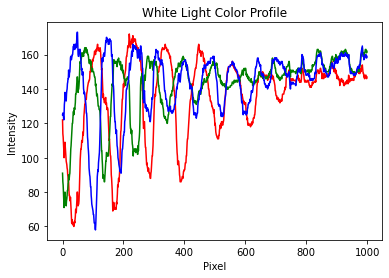

In [5]:
# For white light
df_w = pd.read_csv('./white.csv')
df_w2 = pd.DataFrame() 
df_w2['R'] = df_w['Unnamed: 1']
df_w2['G'] = df_w['R']
df_w2['B'] = df_w['Unnamed: 3']

plt.plot(df_w2.index, df_w2['R'], color ='red')
plt.plot(df_w2.index, df_w2['G'], color ='green')
plt.plot(df_w2.index, df_w2['B'], color ='blue')
plt.title('White Light Color Profile')
plt.ylabel('Intensity')
plt.xlabel('Pixel')
plt.savefig('colorP.png')
plt.show()

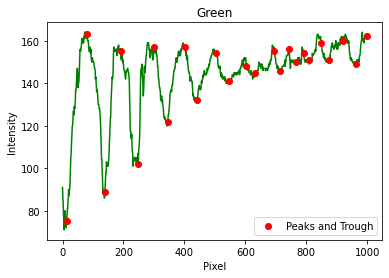

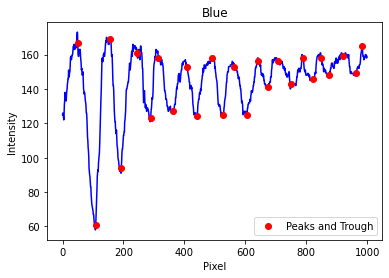

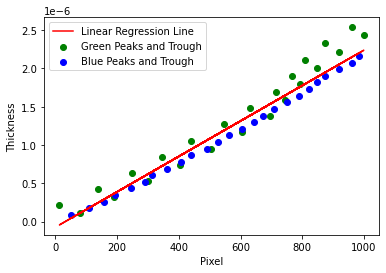

Eqn of Line = y = 2.3146582803818573e-09x + -7.436395401530544e-08


In [6]:
# Manipulating blue and green data for white light
# Using excel to find the index of peaks and trough for green and blue light 
gpeak_val = []
gtrough_val = [] 
wpeak_G = [80, 191, 300, 403, 505, 603, 695, 743, 791, 849, 920, 999]
wtrough_G = [13,139, 247, 345, 440, 545, 632, 715, 767, 810, 874, 962]

bpeak_val = [] 
btrough_val = [] 
wpeak_B = [50, 156, 245, 314, 407, 492, 563, 643, 708, 790, 849, 919, 984]
wtrough_B = [109, 193, 289, 362, 440, 527, 604, 674, 749, 823, 874, 962]

loc_value(wpeak_G, gpeak_val, df_w2, 'G')
loc_value(wtrough_G, gtrough_val, df_w2, 'G')
loc_value(wpeak_B, bpeak_val, df_w2, 'B')
loc_value(wtrough_B, btrough_val, df_w2, 'B')

plt.figure()
plt.plot(df_w2.index, df_w2['G'], color ='green', zorder=0)
plt.scatter(wpeak_G, gpeak_val, color = 'red', zorder=1, label='Peaks and Trough')
plt.scatter(wtrough_G, gtrough_val, color = 'red', zorder=1)
plt.title('Green')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.legend()
plt.savefig('greenP.png')

plt.figure()
plt.plot(df_w2.index, df_w2['B'], color ='blue', zorder=0)
plt.scatter(wpeak_B, bpeak_val, color = 'red', zorder=1, label = 'Peaks and Trough')
plt.scatter(wtrough_B, btrough_val, color = 'red', zorder=1)
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Blue')
plt.legend(loc='lower right')
plt.savefig('blueP.png')
plt.show()

db_g = [] # thickness for bright fringes 
dd_g = [] # thickness for dark fringes
db_b = []
dd_b = []  

bright_d(lambda_g, n_bubble, wpeak_G, db_g)
dark_d(lambda_g, n_bubble, wtrough_G, dd_g)
bright_d(lambda_b, n_bubble, wpeak_B, db_b)
dark_d(lambda_b, n_bubble, wtrough_B, dd_b)

pix_lst = wpeak_G + wtrough_G + wpeak_B + wtrough_B
val_lst = db_g + dd_g + db_b + dd_b

x = np.array(pix_lst).reshape((-1,1))
y = np.array(val_lst)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

# plt.scatter(x, y, color = "black")
plt.scatter(wpeak_G, db_g, color = 'green', zorder=0, label='Green Peaks and Trough')
plt.scatter(wtrough_G, dd_g, color = 'green', zorder=0)
plt.scatter(wpeak_B, db_b, color = 'blue', zorder=0, label = 'Blue Peaks and Trough')
plt.scatter(wtrough_B, dd_b, color = 'blue', zorder=0)
plt.plot(x_train, model.predict(x_train), color = "red", zorder=1, label='Linear Regression Line')
plt.xlabel("Pixel")
plt.ylabel("Thickness")
plt.legend()
plt.show()

print(f'Eqn of Line = y = {model.coef_[0]}x + {model.intercept_}')
# print(f'c = {model.intercept_}')
# print(f'm = {model.coef_}')

In [7]:
# Finding lambdas of red light for each point and taking an average
# Data directly from excel 
w_peakR = [124, 237, 339, 449, 563, 673, 777, 872, 986]
w_troughR = [38, 177, 290, 390, 513, 618, 715, 817, 926]

# Applying function to find the each thickness for each pixel loc 
db_R = []
dd_R = [] 
thick_val(w_peakR, db_R)
thick_val(w_troughR, dd_R)

# Applying function to convert thickness to respective lambdas 
lambda_rb = [] 
lambda_rd = [] 
bright_kai(db_R, lambda_rb)
dark_kai(dd_R, lambda_rd)

# Averaging the lambda for red light 
print(f'The avg lambda for red light is : {avg(lambda_rb, lambda_rd)}') 


The avg lambda for red light is : 6.27893490242061e-07


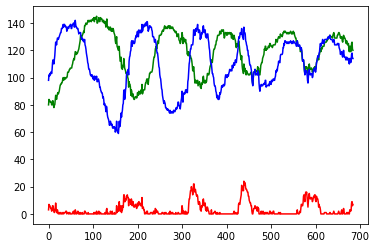

In [8]:
# For cyan light
df_c = pd.read_csv('./cyan.csv')
df_c2 = pd.DataFrame() 
df_c2['R'] = df_c['Unnamed: 1']
df_c2['G'] = df_c['R']
df_c2['B'] = df_c['Unnamed: 3']

plt.plot(df_c2.index, df_c2['R'], color ='red')
plt.plot(df_c2.index, df_c2['G'], color ='green')
plt.plot(df_c2.index, df_c2['B'], color ='blue')
plt.show()

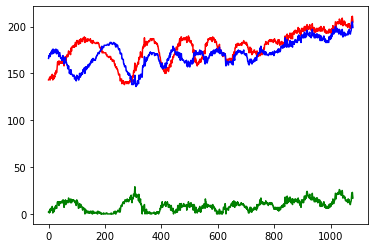

In [9]:
# For magenta light
df_m = pd.read_csv('./magenta.csv')
df_m2 = pd.DataFrame() 
df_m2['R'] = df_m['Unnamed: 1']
df_m2['G'] = df_m['R']
df_m2['B'] = df_m['Unnamed: 3']

plt.plot(df_m2.index, df_m2['R'], color ='red')
plt.plot(df_m2.index, df_m2['G'], color ='green')
plt.plot(df_m2.index, df_m2['B'], color ='blue')
plt.show()

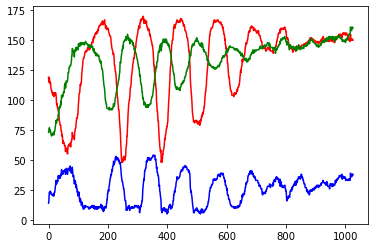

In [10]:
# For yellow light
df_y = pd.read_csv('./yellow.csv')
df_y2 = pd.DataFrame() 
df_y2['R'] = df_y['Unnamed: 1']
df_y2['G'] = df_y['R']
df_y2['B'] = df_y['Unnamed: 3']

plt.plot(df_y2.index, df_y2['R'], color ='red')
plt.plot(df_y2.index, df_y2['G'], color ='green')
plt.plot(df_y2.index, df_y2['B'], color ='blue')
plt.show()